In [26]:
import numpy as np
import pandas as pd
import os
import math
from datetime import datetime

from matplotlib import pyplot as plt
import matplotlib.style as style

In [19]:
data_dir = "/Users/lixinhui/Dropbox (MIT)/17 Fall/A-6.419/Pset6/Data"
filename = "CO2Data.csv"
input_path = os.path.join(data_dir, '')
columns = ['Yr', 'Mn', 'Date_Excel', 'Date', 'CO2', 'season', 'fit', 'season_fit', 'CO2_filled', 'season_filled']
raw_data = pd.read_csv(input_path + filename, skiprows = range(57), header = None, names= columns)
raw_data.head()

,Yr,Mn,Date_Excel,Date,CO2,season,fit,season_fit,CO2_filled,season_filled
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.69,314.42,316.17,314.90,315.69,314.42
3,1958,4,21290,1958.2877,317.45,315.15,317.28,314.98,317.45,315.15
4,1958,5,21320,1958.3699,317.50,314.74,317.83,315.06,317.50,314.74


In [78]:
data = raw_data[['Yr', 'Mn', 'CO2']].copy()
data['date'] = data.apply(lambda row: datetime(year=int(row['Yr']), month=int(row['Mn']), day=1), axis=1)

In [80]:
def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month
ini_date = data['date'][0]
data['month_index'] = data.apply(lambda row: 1+diff_month(row.date, ini_date), axis=1)
data = data[data.CO2 != -99.99]
data.head()

,Yr,Mn,CO2,date,month_index
2,1958,3,315.69,1958-03-01,3
3,1958,4,317.45,1958-04-01,4
4,1958,5,317.50,1958-05-01,5
6,1958,7,315.86,1958-07-01,7
7,1958,8,314.93,1958-08-01,8


In [ ]:
############ 6.2(a) #################

In [81]:
import statsmodels.api as sm

In [96]:
y = data.CO2
X = data.month_index
X = sm.add_constant(X)
f1 = sm.OLS(y, X)
f1 = f1.fit()
f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.047e+04
Date:                Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                        01:37:17   Log-Likelihood:                -1936.2
No. Observations:                 698   AIC:                             3876.
Df Residuals:                     696   BIC:                             3885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.7671      0.298   1029.800      0.000     306.182     307.352
month_index     0.1270      0.001    174.566      0.000       0.126       0.128
==============================================================================
Omnibus:                       28.823   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.507
Skew:                           0.512   Prob(JB):                     1.44e-07
Kurtosis:                       2.810   Cond. No.                         830.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
f1.params

const          306.767103
month_index      0.126996
dtype: float64

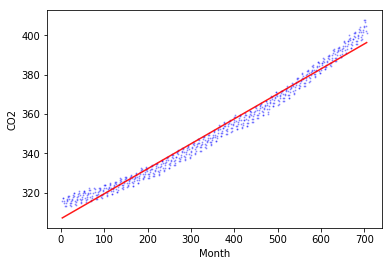

In [98]:
X_prime = np.linspace(X.month_index.min(), X.month_index.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)

y_hat = f1.predict(X_prime)

plt.scatter(X.month_index, y, alpha=0.3, s= 1, color = 'blue')  # Plot the raw data
plt.xlabel("Month")
plt.ylabel("CO2")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)
plt.savefig("2a.png", dpi=150)
plt.show()

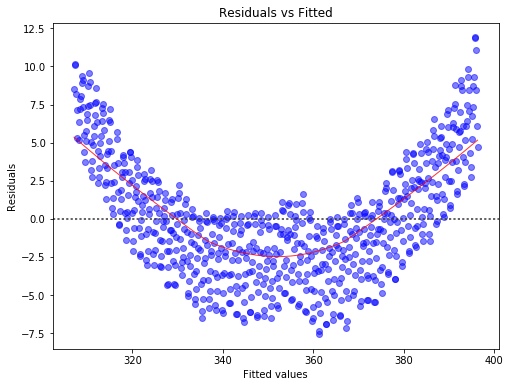

In [105]:
import seaborn as sns
fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(8)
model_fitted_y = f1.fittedvalues
model_residuals = f1.resid
fig.axes[0] = sns.residplot(model_fitted_y, 'CO2', data=data, 
                          lowess=True, 
                          scatter_kws={'color': 'blue','alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
fig.axes[0].set_title('Residuals vs Fitted')
fig.axes[0].set_xlabel('Fitted values')
fig.axes[0].set_ylabel('Residuals')
plt.savefig("2a1.png", dpi=150)
plt.show()

In [109]:
############ 6.2(b) #################
import statsmodels.formula.api as smf
f2 = smf.ols( formula = 'CO2 ~ np.power(month_index, 2) + month_index + 1', data = data)
f2 = f2.fit()
f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.754e+04
Date:                Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                        01:49:59   Log-Likelihood:                -1543.9
No. Observations:                 698   AIC:                             3094.
Df Residuals:                     695   BIC:                             3107.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  314.2065      0.259   1212.005      0.000     313.698     314.716
np.power(month_index, 2)  8.692e-05   2.29e-06     37.998      0.000    8.24e-05    9.14e-05
month_index                  0.0652      0.002     38.838      0.000       0.062       0.068
==============================================================================
Omnibus:                      100.656   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.835
Skew:                          -0.092   Prob(JB):                     2.45e-06
Kurtosis:                       2.076   Cond. No.                     6.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
f2.params

Intercept                   314.206513
np.power(month_index, 2)      0.000087
month_index                   0.065193
dtype: float64

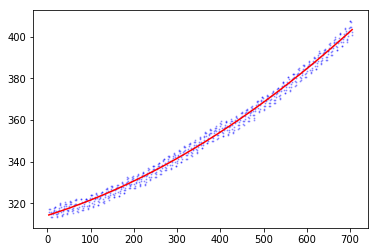

In [114]:
plt.plot(X.month_index, f2.predict(X), 'r')
plt.scatter(X.month_index, y, alpha=0.3, s= 1, color = 'blue')
plt.savefig("2b.png", dpi=150)
plt.show()

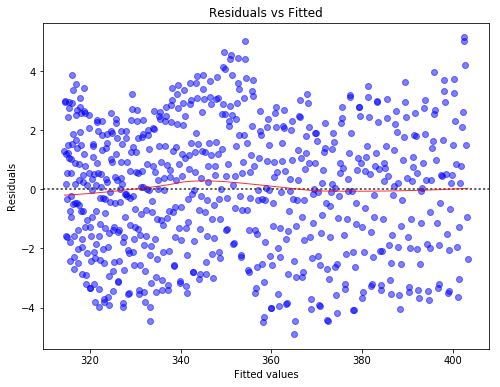

In [110]:
fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(8)
model_fitted_y = f2.fittedvalues
model_residuals = f2.resid
fig.axes[0] = sns.residplot(model_fitted_y, 'CO2', data=data, 
                          lowess=True, 
                          scatter_kws={'color': 'blue','alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
fig.axes[0].set_title('Residuals vs Fitted')
fig.axes[0].set_xlabel('Fitted values')
fig.axes[0].set_ylabel('Residuals')
plt.savefig("2b1.png", dpi=150)
plt.show()

In [ ]:
############ 6.2(c) #################

In [117]:
data['resid'] = pd.Series(f2.resid)

In [118]:
data.head()

,Yr,Mn,CO2,date,month_index,resid
2,1958,3,315.69,1958-03-01,3,1.287126
3,1958,4,317.45,1958-04-01,4,2.981325
4,1958,5,317.50,1958-05-01,5,2.965350
6,1958,7,315.86,1958-07-01,7,1.192878
7,1958,8,314.93,1958-08-01,8,0.196381


In [120]:
def extract_month(m):
    temp = data.loc[data['Mn'] == m]
    return temp['resid'].mean()
months = pd.DataFrame(index = range(1, 13), columns = ['avg_resid'])
for idx in months.index.tolist():
    months['avg_resid'][idx] = extract_month(idx)
months

,avg_resid
1,0.0160134
2,0.668769
3,1.37154
4,2.60855
5,3.05357
6,2.34585
7,0.75705
8,-1.36961
9,-3.15542
10,-3.3382


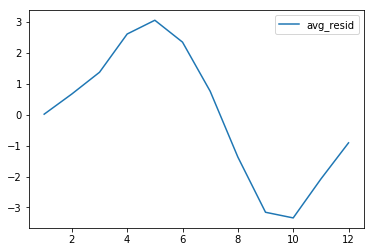

In [137]:
fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(12)
fig = months.plot()
plt.savefig("2d1.png", dpi=150)
plt.show()

In [126]:
data = data.join(months, on = 'Mn', how = 'left')

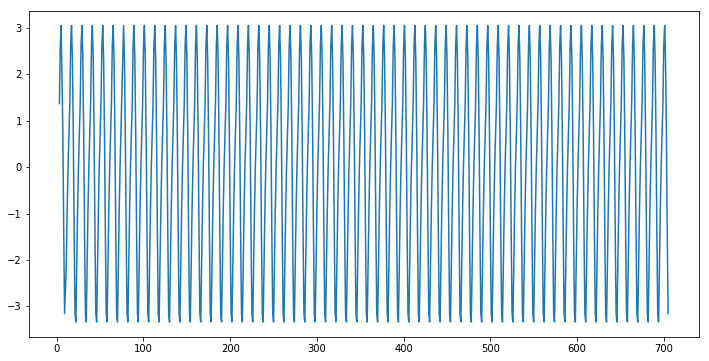

In [133]:
fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(12)
fig = plt.plot(data.month_index, data.avg_resid)
plt.savefig("2d.png", dpi=150)
plt.show()

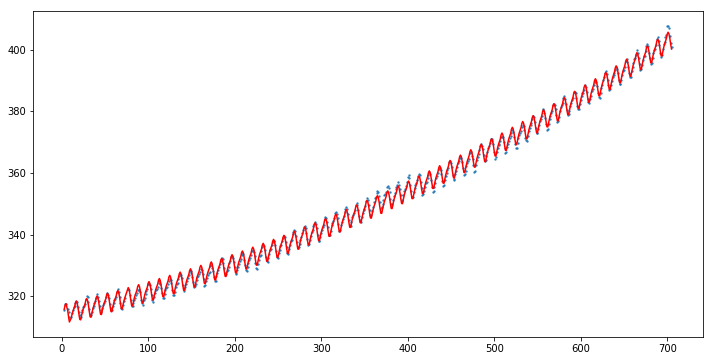

In [132]:
fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(12)
fig = plt.plot(data.month_index, data.avg_resid + f2.fittedvalues, 'r')
plt.scatter(X.month_index, y, alpha=0.8, s= 2)
plt.savefig("2e.png", dpi=150)
plt.show()